# <center><b style="color: rgb(219, 90, 58);">REGRESIÓN LINEAL PARA LA PREDICCIÓN DEL PRECIO DE INMUEBLES</b></center>

## <b style="color: rgb(62, 142, 180);">1. DEFINICIÓN DEL PROBLEMA</b>

#### Se procede al análisis de un dataset relativo a ventas de inmuebles que refleja diversas características de los mismos y se busca poder precedir, a partir de tales datos, cuáles serán los precios de venta de las casas.
#### Para ello se procede a la realización de un análisis de datos basado en REGRESIÓN LINEAL. Un modelo de regresión lineal trata de explicar la relación existente entre una variable dependiente (Y) y otras variables independientes o explicativas (X). La variable dependiente es el precio de la vivienda que se quiere predecir y las variables independientes las características de las casas a partir de las cuales se haga la predicción.

## <b style="color: rgb(62, 142, 180);">2. RECOPILACIÓN DE DATOS</b>

#### Se cuenta con un dataset de ventas de cerca de 22000 viviendas a partir del cual se pueden analizar los datos pertinentes para realizar la predicción.
#### Se siguen los siguientes pasos:

### <b style="color: rgb(245, 115, 83);">1º. IMPORTACIÓN DE LIBRERÍAS:</b>

#### Se importan las librerías correspondientes:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### <b style="color: rgb(245, 115, 83);">2º. IMPORTACIÓN DEL DATASET DESDE EL ARCHIVO DE EXCEL Y FORMATO DEL DATAFRAME:</b>

#### Se comienza importando el dataset desde el archivo de Excel (xls) para lo cual se utiliza la Librería Pandas que incluye la función read_excel().
#### Seguidamente, se da formato al Dataframe. Para ello se utiliza la librería Pandas que incluye un objeto denominado dataframe o df (por convención).
#### A continuación, se utiliza la función head(x) para mostrar las primeras x filas de la base de datos con todas sus columnas a efectos de realizar una vista rápida de la tabla y comprobar sus columnas.

In [3]:
# Se importa la base de datos desde el archivo de Excel:
data = pd.read_excel(io = "../data/regression_data.xls", sheet_name="regression_data1")

# Se le da formato:
df = pd.DataFrame(data)

# Se imprimen los 6 primeros resgistros de la base de datos:
df.head(6)
# print(df) imprimiría la tabla completa aunque no será posible porque su tamaño excede el límite máximo.

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000


### <b style="color: rgb(245, 115, 83);">3º. DEFINICIÓN DE LOS TIPOS DE DATOS:</b>

#### Los tipos de datos pueden ser:
#### <ul><li tye="disc"><u>Numéricos</u>: expresan una cantidad, un número.</li><li><u>Categóricos</u>: no expresan una cantidad sino una etiqueta no cuantificable.</li><li><u>Fechas</u>.</li></ul>
#### En esta base de datos nos enconstramos con los siguientes tipos de datos:
#### <ul><li type=circle>id: numérica. Identificador único de cada registro.</li><li type=circle>date: fecha. Fecha de venta del inmueble.</li><li type=circle>bedrooms: numérica. Nº de dormitorios.</li><li type=circle>bathrooms: numérica. Nº de cuartos de baños.</li><li type=circle>sqft_living: numérica. Superficie habitable antes de 2015 (no incluye renovación).</li><li type=circle>sqft_lot: numérica. Superficie del solar antes de 2015 (no incluye renovación).</li><li type=circle>floors: numérica. Nº de pisos del inmueble.</li><li type=circle>waterfront: categórica. Vistas al mar.</li><li type=circle>view: categórica. Vistas.</li><li type=circle>condition: categórica. Estado del inmueble de 1 (en mal estado) a 5 (en excelente estado).</li><li type=circle>grade: categórica. Calificación general otorgada a la unidad de vivienda, basada en el sistema de calificación del condado de King. 1 pobre, 13 excelente.</li><li type=circle>sqft_above: numérica. Superficie habitable sin contar el sótano.</li><li type=circle>sqft_basement: numérica. Superficie habitable del sótano.</li><li type=circle>yr_built: numérica. Año de construcción.</li><li type=circle>yr_renovated: numérica. Año de renovación.</li><li type=circle>zipcode: categórica. Código Postal.</li><li type=circle>lat: numérica. Latitud.</li><li type=circle>long: numérica. Longitud.</li><li type=circle>sqft_living15: numérica. Superficie habitable después de 2015 (incluye renovación).</li><li type=circle>sqft_lot15: numérica. Superficie del solar después de 2015 (incluye renovación).</li><li type=circle>price: numérica. Precio de venta.</li></ul>

## <b style="color: rgb(62, 142, 180);">3. PREPARACIÓN DE LOS DATOS PARA SU ANÁLISIS: LIMPIEZA, FILTRADO Y PREPARACIÓN DE LA BASE DE DATOS</b>

#### Se limpia la base de datos lo cual implica.

#### <ul><li type=square>Estandarizar los nombres de las columnas: todos los valores deben seguir el mismo formato, unidades...</li><li type=square>Estandarizar unidades de una sola columna.</li><li type=square>Eliminar y reorganizar columnas.</li><li type=square>Trabajar con tipos de datos (establecer los tipos correctos).</li><li type=square>Filtrado de datos.</li><li type=square>Eliminar duplicados (redundantes, no agregan información).</li><li type=square>Corregir errores tipográficos.</li><li type=square>Reemplazar/eliminar valores faltantes (la mayoría de los modelos no pueden manejarlos).</li></ul>

#### En definitiva, se prepara la tabla para trabajar con ella.

#### Se llevan a cabo las siguientes comprobaciones y operaciones:

### <b style="color: rgb(245, 115, 83);">1. Se comprueba los tipos de datos a nivel de variables de programación de Python:</b>

#### Se verifica que todas son variables numéricas (int, float e incluso la fecha que se puede manejar como numérica). Por tanto, no será necesaria ninguna modificación pues siendo todas numéricas son aptas para llevar a cabo un análisis de regresión lineal.

In [4]:
# Por medio de la función dtypes(), se muestran los tipos de datos de cada columna de la base de datos:
print(df.dtypes)

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object


### <b style="color: rgb(245, 115, 83);">2. Se obtiene información general del dataframe:</b>

#### Se comprueba que no hay celdas con valores nulos pues de todas las columnas (21) y filas (21597) el contenido es non null.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

### <b style="color: rgb(245, 115, 83);">3. Se comprueba si existen valores perdidos (<i>missing values</i>):</b>

#### Los valores perdidos son aquellos que no almacenan ningún valor. Estos valores en la librería Pandas se identifican con Non y NaN (Not a Number). Se comprueba que no hay ningún valor perdido.

In [6]:
df.isna().sum() # Se utiliza la función sum() para obtener el sumatorio y poder obtener la información que necesitamos.

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

### <b style="color: rgb(245, 115, 83);">4. Se detectan valores atípicos (<i>outliers</i>):</b>

#### Un valor atípico es una observación que numéricamente es distante de los restantes datos.

#### Para detectarlos se utiliza la librería sklearn.

#### 1º. Se comprueban los valores atípicos en relación con las columnas que contienen <u><b>valores cuantificables</b></u> a efectos de comprobar si alguno despunta de alguna manera. Sólo se comprueba respecto a aquellas variables que tenga sentido ya que, por ejemplo, no tendría sentido comprobar un pico de latitud, longitud o código postal. De modo que: sqft_basement, sqft_living, sqft_lot, sqft_living15, sqft_lot15, sqft_above, price.

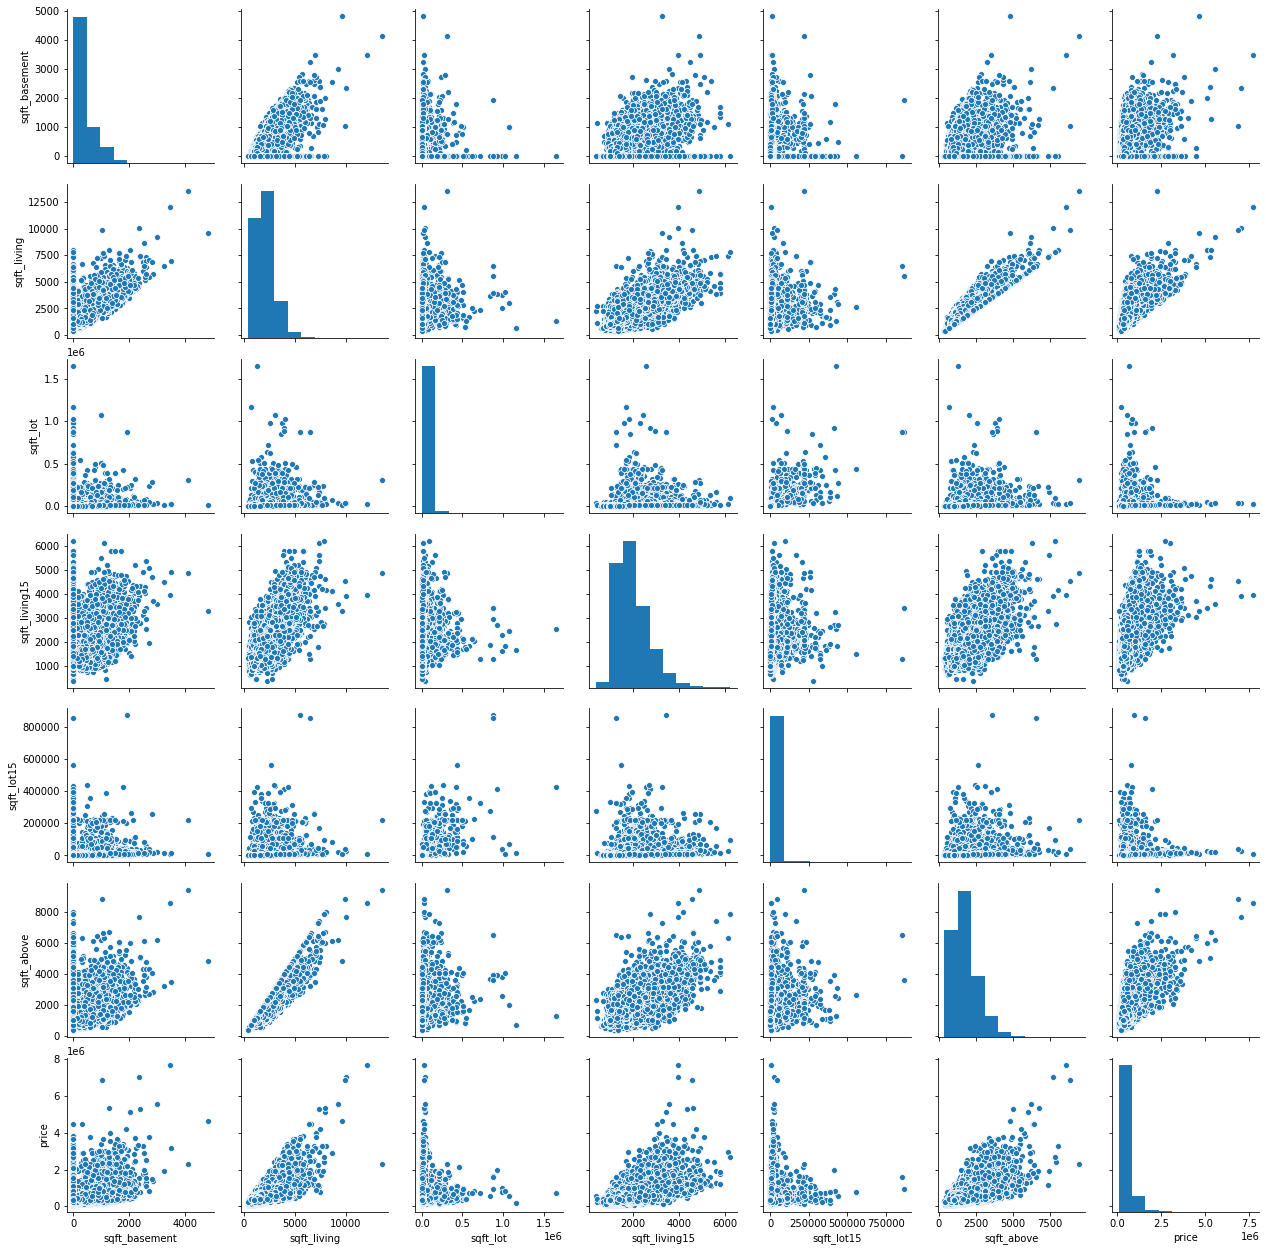

In [7]:
# Se utiliza la función pairplot() para trazar diversas distribuciones bivariadas por pares en el conjunto de datos:
# Se muestra como una matriz de gráficos siendo los gráficos disgonales gráficos nivariados.
sns.pairplot(df[['sqft_basement', 'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'price']])

#### No se observan en realidad valores atípicos ya que aunque en apariencia se observan ciertos valores que parecen estar distanciados, en realidad se hayan dentro del campo que marca la tendencia. Por ejemplo, en la siguiente imagen se ha marcado la tendencia en rojo y puede comprobarse commo los valores que parecen aislados se encuentran dentro de esa área:
<center><img src="ejemplo_tendencia.png"></center>

#### 2º. Se comprueban los valores atípicos en <u><b>otras columnas</b></u>. Por ejemplo, en waterfront se comprueba que sólo tenga valores 0 o 1, en grade que los valores vayan de 1 a 13, en bedrroms y bathrooms que no existan valores que destaquen demasiado, etc. De modo que: bedrooms, bathrooms, floors, waterfront, view, condition, grade, yr_built, yr_renovated.

#### Para realizar esta tarea resulta útil la función describe() de la librería Pandas que nos proporciona un resmen de las estadísticas del DataFrame. Comprobando los máximos y los mínimos se pueden detectar estos valores atípicos. También se puede utilizar la función unique() de la Librería Pandas que proporciona los valores únicos de cada columna.

In [8]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


#### <ul><li>bedrooms: se observa un valor sospechoso porque muestra un mínimo de 1 habitación, pero un máximo de 33 habitaciones. Podría tratarse de un valor atípico así que se saca un plot (boxenplot) para tratar de averiguar qué podría estar ocurriendo:</ul>

<AxesSubplot:xlabel='bedrooms'>

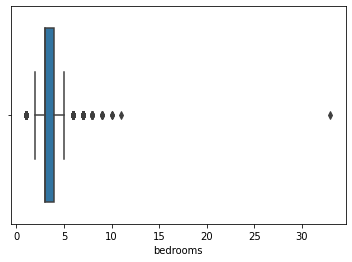

In [9]:
sns.boxplot(df['bedrooms'])

#### Se observa claramente un <i>outlier</i> en las 33 habitaciones y otros 3 en torno a las 10 habitaciones. De manera que se procede a filtrar:

In [10]:
df = df[df.bedrooms <= 5] # Se filtra hasta las 5 habitaciones.
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.126300e+04,21263.000000,21263.000000,21263.000000,2.126300e+04,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,2.126300e+04
mean,4.583740e+09,3.326012,2.099163,2059.754503,1.505278e+04,1.491911,0.007478,0.229883,3.408926,7.650849,1776.172365,283.582138,1971.141419,83.070122,98077.909937,47.559664,-122.213521,1982.070404,12734.246155,5.354206e+05
std,2.877828e+09,0.827807,0.749797,893.214278,4.146123e+04,0.539395,0.086152,0.758495,0.650007,1.168076,814.804818,432.448929,29.342651,398.637387,53.509168,0.138839,0.141136,682.020008,27175.744967,3.547799e+05
min,1.200019e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123700e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469600,-122.328000,1480.000000,5100.000000,3.200000e+05
50%,3.904940e+09,3.000000,2.250000,1900.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.229000,1830.000000,7620.000000,4.500000e+05
75%,7.325900e+09,4.000000,2.500000,2520.000000,1.062300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,545.000000,1997.000000,0.000000,98117.000000,47.678150,-122.124000,2360.000000,10078.000000,6.399665e+05
max,9.900000e+09,5.000000,6.750000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.060000e+06


#### <ul><li>bathrooms: se realiza la misma operación que con bedrooms, pero previamente se eliminan los decimales lo cual puede lograrse transformando el float en int:</li></ul>

In [11]:
# Se comprueban los valores únicos:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [12]:
# Se transforma el float en int:
df['bathrooms'] = df['bathrooms'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21263 non-null  int64         
 1   date           21263 non-null  datetime64[ns]
 2   bedrooms       21263 non-null  int64         
 3   bathrooms      21263 non-null  int64         
 4   sqft_living    21263 non-null  int64         
 5   sqft_lot       21263 non-null  int64         
 6   floors         21263 non-null  float64       
 7   waterfront     21263 non-null  int64         
 8   view           21263 non-null  int64         
 9   condition      21263 non-null  int64         
 10  grade          21263 non-null  int64         
 11  sqft_above     21263 non-null  int64         
 12  sqft_basement  21263 non-null  int64         
 13  yr_built       21263 non-null  int64         
 14  yr_renovated   21263 non-null  int64         
 15  zipcode        2126

In [13]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.126300e+04,21263.000000,21263.000000,21263.000000,2.126300e+04,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,2.126300e+04
mean,4.583740e+09,3.326012,1.733763,2059.754503,1.505278e+04,1.491911,0.007478,0.229883,3.408926,7.650849,1776.172365,283.582138,1971.141419,83.070122,98077.909937,47.559664,-122.213521,1982.070404,12734.246155,5.354206e+05
std,2.877828e+09,0.827807,0.712105,893.214278,4.146123e+04,0.539395,0.086152,0.758495,0.650007,1.168076,814.804818,432.448929,29.342651,398.637387,53.509168,0.138839,0.141136,682.020008,27175.744967,3.547799e+05
min,1.200019e+06,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123700e+09,3.000000,1.000000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469600,-122.328000,1480.000000,5100.000000,3.200000e+05
50%,3.904940e+09,3.000000,2.000000,1900.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1975.000000,0.000000,98065.000000,47.571300,-122.229000,1830.000000,7620.000000,4.500000e+05
75%,7.325900e+09,4.000000,2.000000,2520.000000,1.062300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,545.000000,1997.000000,0.000000,98117.000000,47.678150,-122.124000,2360.000000,10078.000000,6.399665e+05
max,9.900000e+09,5.000000,6.000000,10040.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.060000e+06


<AxesSubplot:xlabel='bathrooms'>

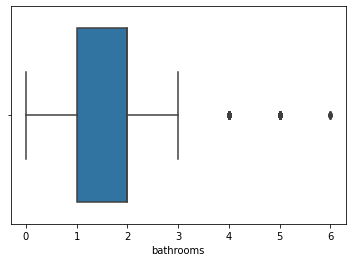

In [14]:
# Se saca un plot donde poder visualizar los posibles valores atípicos:
sns.boxplot(df['bathrooms'])

#### Se observan claramente 3 <i>outliers</i> en 6, 7 y 8 baños. De manera que se procede a filtrar:

In [15]:
df = df[df.bathrooms <= 3] # Se filtra hasta las 3 baños.
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.094400e+04,20944.000000,20944.000000,20944.000000,2.094400e+04,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,20944.000000,2.094400e+04
mean,4.594638e+09,3.309922,1.696811,2020.454927,1.471191e+04,1.484673,0.006684,0.217962,3.411144,7.611774,1744.197383,276.257544,1970.851939,81.757974,98078.180052,47.559146,-122.214269,1962.301471,12481.520913,5.195085e+05
std,2.878432e+09,0.820210,0.648836,825.377015,4.025135e+04,0.538144,0.081487,0.736754,0.650889,1.121522,763.608574,420.299251,29.293945,395.601177,53.516357,0.139369,0.141085,657.742287,25629.575203,3.120914e+05
min,1.200019e+06,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.126049e+09,3.000000,1.000000,1410.000000,5.006750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.467550,-122.329000,1480.000000,5093.500000,3.199900e+05
50%,3.905040e+09,3.000000,2.000000,1880.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,98065.000000,47.570550,-122.232000,1820.000000,7590.000000,4.450000e+05
75%,7.335400e+09,4.000000,2.000000,2490.000000,1.050000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,530.000000,1996.000000,0.000000,98118.000000,47.678500,-122.125000,2330.000000,10001.000000,6.270000e+05
max,9.900000e+09,5.000000,3.000000,7620.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000,4.490000e+06


#### <ul><li>floors: se detectan ciertos valores sospechosos pues el máximo son 3,5 pisos, de modo que se procede a comprobar los valores únicos de esta columna:</li></ul>

In [16]:
# Se comprueban los valores únicos:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

#### El problema de los decimales se puede solucionar transformando el float en un int:

In [17]:
# Se transforma el float en int:
df['floors'] = df['floors'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20944 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20944 non-null  int64         
 1   date           20944 non-null  datetime64[ns]
 2   bedrooms       20944 non-null  int64         
 3   bathrooms      20944 non-null  int64         
 4   sqft_living    20944 non-null  int64         
 5   sqft_lot       20944 non-null  int64         
 6   floors         20944 non-null  int64         
 7   waterfront     20944 non-null  int64         
 8   view           20944 non-null  int64         
 9   condition      20944 non-null  int64         
 10  grade          20944 non-null  int64         
 11  sqft_above     20944 non-null  int64         
 12  sqft_basement  20944 non-null  int64         
 13  yr_built       20944 non-null  int64         
 14  yr_renovated   20944 non-null  int64         
 15  zipcode        2094

#### <ul><li>waterfront: no hay valores atípicos pues va de 0 a 1.</li><li>view: sí hay valores atípicos porque va de 0 a 4, de modo que se procede a su filtrado:</li></ul>

In [18]:
df = df[df.view <= 1] # Se filtra hasta 1.
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.932000e+04,19320.000000,19320.000000,19320.000000,1.932000e+04,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,19320.000000,1.932000e+04
mean,4.582755e+09,3.295963,1.673602,1964.657143,1.387664e+04,1.435766,0.000052,0.016304,3.403002,7.544203,1716.966253,247.690890,1971.382350,71.698706,98076.879400,47.559219,-122.211457,1916.052070,11964.989959,4.894683e+05
std,2.873368e+09,0.814667,0.635319,781.947657,3.605380e+04,0.550296,0.007194,0.126647,0.646565,1.074825,747.668365,391.108727,29.253941,371.464573,52.657666,0.140279,0.140060,627.367569,23982.017192,2.658356e+05
min,1.200019e+06,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,460.000000,651.000000,7.800000e+04
25%,2.125059e+09,3.000000,1.000000,1390.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1952.000000,0.000000,98033.000000,47.463100,-122.325000,1460.000000,5027.000000,3.100000e+05
50%,3.904902e+09,3.000000,2.000000,1830.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1975.000000,0.000000,98065.000000,47.570700,-122.225000,1790.000000,7528.500000,4.300000e+05
75%,7.305300e+09,4.000000,2.000000,2420.000000,1.022300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,480.000000,1997.000000,0.000000,98117.000000,47.680400,-122.123000,2260.000000,9820.250000,5.990000e+05
max,9.900000e+09,5.000000,3.000000,6810.000000,1.164794e+06,3.000000,1.000000,1.000000,5.000000,13.000000,6430.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,438213.000000,4.490000e+06


#### <ul><li>condition: no se observan valores atípicos porque su mínimo es 1 y su máximo es 5 cuando debe ir de 1 a 5.</li><li>grade: no se observan valores atípicos porque su mínimo es 3 y su máximo es 13 cuando debe ir de 1 a 13.</li><li>yr_built: no se observan valores atípicos porque va de 1900 a 2015.</li><li>yr_renovated: sí que se observan valores sospechosos porque su máximo es 2015, pero su mínimo es el año 0. Sin embargo, mñas adelante se interpretará el valor 0 de esta columna como el hecho de que el inmueble no ha sido renovado y con estos datos se creará una variable dummy, así que no se filtra este dato. A continuación, se exponen los valores únicos de esta columa y ahí se observa que uno de ellos es el 0 (que interpretaremos como ausencia de renovación) y el resto son años diferentes a partir de 1991 por lo que tales valores no son sospechosos.</li></ul>

In [19]:
# Primero comprobamos a partir de qué año constan datos en la base de datos.
# Para ello se obtienen los valores únicos en la columna de yr_renovated:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

### <b style="color: rgb(245, 115, 83);">5. Se crean variables nuevas:</b>

#### Se crean variables nuevas que pueden resultar útiles para el análisis. Estas variables nos muestran información que nos proporcionan los datos almacenados en la tabla, no se trata de datos nuevos.

#### Algunas de estas variables con variables <i>dummies</i>. Una variable <i>dummy</i> en estadística es una variable, y en concreto en el análisis de regresión, es una variable ficticia que sólo puede tomar el valor 1 o el valor 0 para indicar la presencia o la ausencia de algún efecto categórico que puede afectar al resultado.

In [20]:
# Creamos una variable dummy que tome el valor 1 si el inmueble tiene basement o 0 si no lo tiene:
df['dummy_basement'] = list(map(lambda x: 1 if x>0 else 0, df.sqft_basement.tolist()))

# Creamos una variable dummy que tome el valor 1 si el inmueble ha sido renovado o 0 si no lo ha sido:
df['dummy_renovated'] = list(map(lambda x: 1 if x>0 else 0, df.yr_renovated.tolist()))

# Creamos una variable que indique el año de venta del inmueble:
df['year'] = list(map(lambda x: x.year,df.date.tolist()))

# Creamos una varibale que indique la antigüedad con que se vendió el inmueble (año de venta menos año de construcción del inmueble):
df['antiguedad'] = df.apply(lambda x: x['year']-x['yr_built'], axis=1)

# Creamos una variable que sea el año de venta menos el año de construcción si el año de renovación es 0 (no hubo renovación)
# o año de venta menos año de renovación si el año de renovación es distinto de 0 (sí hubo renovación):
# Nos indica el nº de años desde la última renovación:
df['time_last_renovation'] = df.apply(lambda x: x['year']-x['yr_renovated'] if x.dummy_renovated ==1 else 0, axis=1)

# Creamos una variable 'sqft_living_actualized' que sea sqft_living si es 2014 o sqft_living15 si es 2015:
df['sqft_living_actualized'] = df.apply(lambda x: x['sqft_living'] if x.year == 2014 else x['sqft_living15'], axis=1)

# Creamos una variable 'sqft_lot_actualized' que sea sqft_lot si es 2014 o sqft_lot15 si es 2015:
df['sqft_lot_actualized'] = df.apply(lambda x: x['sqft_lot'] if x.year == 2014 else x['sqft_lot15'], axis=1)

# Creamos una variable para comprobar si hay variación temporal del precio:
df['trend'] = df.apply(lambda x: 12+x.date.month if x.year == 2015 else x.date.month, axis=1)

# Creamos un grupo de variables dummies: 2014 = 1 y 2015 = 0 y una por estación:
df['dummy_14'] = df.apply(lambda x: 1 if x.year == 2014 else 0, axis=1)
df['dummy_winter'] = df.apply(lambda x: 1 if x.date.month in[1,2,3] else 0, axis=1)
df['dummy_spring'] = df.apply(lambda x: 1 if x.date.month in[4,5,6] else 0, axis=1)
df['dummy_summer'] = df.apply(lambda x: 1 if x.date.month in[7,8,9] else 0, axis=1)
df['dummy_autom'] = df.apply(lambda x: 1 if x.date.month in[10,11,12] else 0, axis=1)

# Creamos una variable que nos indica qué casas que tienen vistas al mar se vendieron en primavera:
df['dummy_spring_waterfront'] = df.dummy_spring * df.waterfront

df.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,time_last_renovation,sqft_living_actualized,sqft_lot_actualized,trend,dummy_14,dummy_winter,dummy_spring,dummy_summer,dummy_autom,dummy_spring_waterfront
0,7129300520,2014-10-13,3,1,1180,5650,1,0,0,3,...,0,1180,5650,10,1,0,0,0,1,0
1,6414100192,2014-12-09,3,2,2570,7242,2,0,0,3,...,23,2570,7242,12,1,0,0,0,1,0
2,5631500400,2015-02-25,2,1,770,10000,1,0,0,3,...,0,2720,8062,14,0,1,0,0,0,0
3,2487200875,2014-12-09,4,3,1960,5000,1,0,0,5,...,0,1960,5000,12,1,0,0,0,1,0
4,1954400510,2015-02-18,3,2,1680,8080,1,0,0,3,...,0,1800,7503,14,0,1,0,0,0,0


### <b style="color: rgb(245, 115, 83);">6. Se exportan los datos limpios:</b>

#### Se exportan los datos limpios en un archivo con extensión .csv.

In [21]:
df.to_csv('../data/clean_data.csv')

## <b style="color: rgb(62, 142, 180);">4. ANÁLISIS DE REGRESIÓN LINEAR</b>

#### El objetivo de un modelo de regresión es intentar explicar la relación que existe entre una variable dependiente (Y) y una serie de variables independientes (X1, X2... Xn).

#### Partimos de la utilización de la técnica de regresión de los Mínimos Cuadrados Ordinarios (OLS) de modo que buscaremos que el resultado de r^2 sea lo más cercano posible a 1 pues cuanto más se acerque a 1, mejor será el modelo.

### <b style="color: rgb(245, 115, 83);">MODELO 1:</b>

#### Comienzan las tareas de análisis con la <b><u>CREACIÓN DEL MODELO</u></b>. En este primer modelo la variable dependiente (Y) es el precio de los inmuebles que se quiere predecir y como variables dependientes se han tomado las siguientes: 'bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'antiguedad', 'dummy_renovated', 'time_last_renovation', 'dummy_basement', 'sqft_basement', 'sqft_above', 'sqft_living_actualized', 'sqft_lot_actualized', 'trend', 'dummy_winter', 'dummy_spring', 'dummy_summer', 'dummy_spring_waterfront', 'lat', 'long'.

In [22]:
Y = df.price #Variable explicada.
regresores = ['bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'antiguedad', 'dummy_renovated', 'time_last_renovation', 'dummy_basement', 'sqft_basement', 'sqft_above', 'sqft_living_actualized', 'sqft_lot_actualized', 'trend', 'dummy_winter', 'dummy_spring', 'dummy_summer', 'dummy_spring_waterfront', 'lat', 'long']
X = df[regresores] #Los regresores: variables que explican.

#### A continuación, <b><u>SE DIVIDE LA BASE DE DATOS</u></b> en una parte de entrenamiento (67%) y una parte de test (33%).

In [23]:
# División de la BD en parte de entrenamiento (67) y parte de test (33):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

#### Seguidamente, <b><u>SE ENTRENA EL MODELO</u></b>.

In [24]:
#Entrenamiento del modelo para el 66% de los datos de la BD:
model = LinearRegression(fit_intercept=True).fit(X_train,Y_train)

#### Por último, <b><u>SE EVALÚA EL MODELO</u></b>.

<AxesSubplot:xlabel='price'>

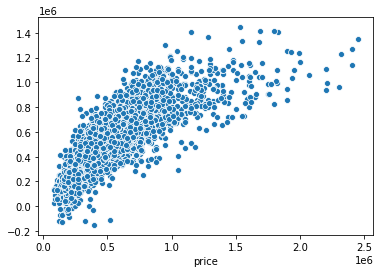

In [25]:
# Evaluar el modelo:
sns.scatterplot(Y_test, model.predict(X_test)) # La función predict() ya tiene en cuenta el intercept.

#### El vista de este resultado, observando la tendencia parece que cuanto mayor es el precio, más difícil es de predecir. Por ejemplo, para un precio real de de 0.5, se observa un rango de predicción de este modelo de entre 0.1 y 0.9 aproximadamente. Sin embargo, a medida que el precio aumenta, este rango también lo hace. Por ejemplo, para un precio real de 1.5 parece que la predicción oscilaría entre 0.8 y 2.0 aproximadamente. De modo que el margen va aumentando y, en consecuencia, el modelo se va haciendo más ineficiente a medida que aumentan los precios.
<center><img src="ejemplo_prediccion.png"></center>

#### Se comprueba el valor de los cuadrados <b><u>OLS</u></b>:

In [26]:
model.score(X,Y) #r^2

0.658661045376554

#### Este resultado de 0.65 nos indica que el 65% de la variación del precio de los inmuebles es explicada por la información de la base de datos y el resto (35%) hasta el 100% por otra infromación que no está en la base de datos. 0.65 es un resultado bastante bueno para este primer modelo.

#### A efectos de obtener mayor información y más conclusiones interesantes, se desglosan los correspondientes <b><u>COEFICIENTES</u></b>:

In [27]:
for i in range(len(regresores)):
    print(regresores[i],list(model.coef_)[i])

bathrooms 28396.177597808735
bedrooms -21180.81300206975
floors 12478.701509327919
waterfront 4.691479205121141e-09
view 112185.69407625643
condition 31777.688488932898
grade 101055.2712971609
antiguedad 2230.9220462143603
dummy_renovated 113326.3443322907
time_last_renovation -3198.6127557451146
dummy_basement 27534.852506479994
sqft_basement 79.91289083792319
sqft_above 141.10111789179743
sqft_living_actualized 12.816039852791873
sqft_lot_actualized 0.04059211820855616
trend 3441.865722181867
dummy_winter 8352.005675526078
dummy_spring 22046.141745711502
dummy_summer 10903.67413618573
dummy_spring_waterfront -2.9103830456733704e-11
lat 538035.4591708401
long -53777.68916763906


#### De estos coeficientes podemos extraer conclusiones interesantes. En primer lugar, observando las variables dummies sabemos que el mero hecho de tener vistas al mar aumenta el precio del inmueble en 4.691479205121141e-09, el mero hecho de haber sido renovado incrementa en 113326.3443322907, cada metro cuadrado extra de sótano aumenta 79.91289083792319 y así sucesivamente con todas estas variables.

#### Por otra parte, por cada baño adicional aumenta en 28396.177597808735, por cada piso 12478.701509327919, etc. Sin embargo, el valor de time_last_renovarion es negativo lo cual indica que resta valor porque cuanto más antiguo es, peor.

#### Por otra parte, observamos ciertos datos curiosos como que los dormitorios penalizan lo cual podría deberser a diferentes circunstancias de las preferencias de mercado en esta zona como, por ejemplo, que los compradores valoren más los espacios comunes amplios en vez del nº de dormitorios.

#### También resultan interesantes los datos de latitud y longitud ya el valor aumenta por cada grado que aumenta la latitud y disminuye por cada grado que aumenta la longitud, lo cual nos indica que están mejor valorados los inmuebles ubicados en la zona noroeste.

#### Igualmente curiosos resulta la información aportada por los datos de las fechas. Por una parte, éstos nos han permitido obtener valores relacionados con las ventas por estaciones del año y se observa que la ganancia es mayor cuando el inmueble se vende en primavera de manera que compensa esperar a esta época para vender el inmueble y para el comprador sería preferible comprarlo en verano. Por otra parte, trend nos indica que cada mes que pasa desde enero de 2014 hasta diciembre de 2015 aumenta el precio en 3441.865722181867 por lo que está claro que al vendedor le compensa vender lo más tarde posible porque los precios en el mercado inmobiliario van subiendo.

#### Ahora bien, a la hora de interpretar estos coeficientes hayque tener en cuenta el intercept que es la ordenada en el origen, es decir, de donde todos parten, de modo que ese valor debe ser restado. Este intercept ya es tenido en cuenta por la función predict().

In [28]:
model.intercept_

-32981381.661415868

#### Para concluir, <b><u>SE REALIZA LA ESTIMACIÓN PARA TODO EL DATASET:</u></b>.

In [29]:
# Estimación para toda la BD:
model = LinearRegression(fit_intercept=True).fit(X,Y)
model.score(X,Y) #r^2

0.6588939992125691

In [30]:
#Coeficientes en toda la BD:
for i in range(len(regresores)):
    print(regresores[i],list(model.coef_)[i])

bathrooms 28665.38796469509
bedrooms -22065.884637388754
floors 12041.226752492956
waterfront 82132.55792581657
view 119776.35604967664
condition 31874.28715081985
grade 97663.36364312559
antiguedad 2174.4874088088873
dummy_renovated 105579.93569740327
time_last_renovation -3059.5221569915934
dummy_basement 25281.554140804757
sqft_basement 79.57108759391967
sqft_above 137.5411861093561
sqft_living_actualized 17.89641739087712
sqft_lot_actualized 0.057625924531595096
trend 3307.0518845914594
dummy_winter 7552.651389656351
dummy_spring 21878.064069216944
dummy_summer 9101.989020803745
dummy_spring_waterfront -1.7462298274040222e-10
lat 533103.1114276716
long -50174.738088421116


In [31]:
model.intercept_

-32277479.620901756

#### Finalmente, se <b><u>GUARDA EL MODELO</b></u>:

In [32]:
pickle.dump(model, open("../models/model1.pkl", "wb"))
model1 = pickle.load(open("../models/model1.pkl", "rb"))

### <b style="color: rgb(245, 115, 83);">MODELO 3:</b>

#### Para este tercer modelo sólo se toman como variables dependientes los mismos valores que en el modelo 1 pero escalados:

StandardScaler()


<AxesSubplot:xlabel='price'>

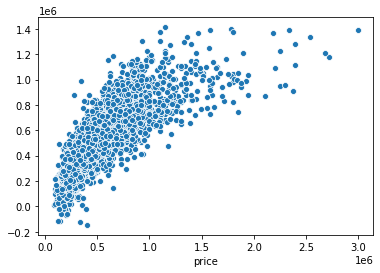

In [33]:
# Creación del modelo con los regresores inciiales en la BD:
Y = df.price #Variable explicada.
regresores3 = ['bathrooms', 'bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'antiguedad', 'dummy_renovated', 'time_last_renovation', 'dummy_basement', 'sqft_basement', 'sqft_above', 'sqft_living_actualized', 'sqft_lot_actualized', 'trend', 'dummy_winter', 'dummy_spring', 'dummy_summer', 'dummy_spring_waterfront', 'lat', 'long']
X = df[regresores3] #Los regresores: variables que explican.

# Escalamos: a cada valor de la variable le restamos su media y dividimos ese resultado entre la desviación típica.
# Nos queda entre -1 y 1.
scaler = StandardScaler()
print(scaler.fit(X))

X = scaler.transform(X)

# División de la BD en parte de entrenamiento (67) y parte de test (33):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

#Entrenamiento del modelo para el 66% de los datos de la BD:
model3 = LinearRegression(fit_intercept=True).fit(X_train,Y_train)

# Evaluar el modelo:
sns.scatterplot(Y_test, model3.predict(X_test)) # La función predict() ya tiene en cuenta el intercept.

In [34]:
model3.score(X,Y) #r^2

0.6585973836106128

In [35]:
#Coeficientes en toda la BD:
for i in range(len(regresores3)):
    print(regresores3[i],list(model.coef_)[i])

bathrooms 28665.38796469509
bedrooms -22065.884637388754
floors 12041.226752492956
waterfront 82132.55792581657
view 119776.35604967664
condition 31874.28715081985
grade 97663.36364312559
antiguedad 2174.4874088088873
dummy_renovated 105579.93569740327
time_last_renovation -3059.5221569915934
dummy_basement 25281.554140804757
sqft_basement 79.57108759391967
sqft_above 137.5411861093561
sqft_living_actualized 17.89641739087712
sqft_lot_actualized 0.057625924531595096
trend 3307.0518845914594
dummy_winter 7552.651389656351
dummy_spring 21878.064069216944
dummy_summer 9101.989020803745
dummy_spring_waterfront -1.7462298274040222e-10
lat 533103.1114276716
long -50174.738088421116


#### La primera conclusión importante de este tercer modelo es que escalando prácticamente no cambia el resultado, el valor de los cuadrados es prácticamente el mismo, un 0.66. Los coeficientes también son los mismos.

#### Se <b><u>GUARDA</b></u> el modelo:

In [36]:
pickle.dump(model3, open("../models/model3.pkl", "wb"))
model3 = pickle.load(open("../models/model3.pkl", "rb"))

#### Se <b><u>GUARDA</b></u> el scaler:

In [37]:
pickle.dump(scaler, open('../scalers/scaler_model3.pkl', 'wb'))
sc = pickle.load(open('../scalers/scaler_model3.pkl', 'rb'))